In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# gt_path_left = '/datashare/APAS/transcriptions_tools_left_new/P018_tissue2.txt'
# gt_path_right = '/datashare/APAS/transcriptions_tools_right_new/P018_tissue2.txt'
# pred_path = '/home/student/Adams/shell_code_surgical_data_science/ToolsPredictions/P018_tissue2.npy'

gesture_gt_path = '/datashare/APAS/transcriptions_gestures/P016_balloon2.txt'
pred_path = '/home/student/Adams/shell_code_surgical_data_science/P016_balloon2_model_predictions.npy'

In [49]:
tool_colors = ['crimson','c','g','m','gold','b']

In [50]:
def parse_gt(path):
    file_ptr = open(path, 'r')
    gt_source = file_ptr.read().split('\n')[:-1]
    content =[]
    for line in gt_source:
        info = line.split()
        line_content = (int(info[2][1]), round((int(info[1])-int(info[0]) + 1)/6))
        content.append(line_content)
    return content

In [51]:
# content_left = parse_gt(gt_path_left)
# content_right = parse_gt(gt_path_right)
content_gesture = parse_gt(gesture_gt_path)

In [52]:
def preds2visformat(preds):
    res = []
    count = 0 
    last_value = None
    for pred in preds:
        if last_value is None:
            last_value = pred
            count = 1
        elif last_value == pred:
            count += 1
        else:
            res.append((last_value, count))
            count = 1
            last_value = pred
    res.append((last_value, count))
    return res

In [53]:
preds = np.load(pred_path)
pred_content_gesture = preds2visformat(preds)


In [54]:
# preds = np.load(pred_path)
# right_preds = np.argmax(preds[:,0,:], axis=1)
# left_preds = np.argmax(preds[:,1,:], axis=1)
# pred_content_right = preds2visformat(right_preds)
# pred_content_left = preds2visformat(left_preds)

In [55]:
category_names = ['G0', 'G1',
                  'G2', 'G3', 'G4', 'G5']
results = {
    'Ground Truth': content_gesture,
    'Predictions': pred_content_gesture,
}

In [56]:
# category_names = ['T0', 'T1',
#                   'T2', 'T3', 'T4']
# results = {
#     'Ground Truth (left)': content_left,
#     'Predictions (left)': pred_content_left,
#     'Ground Truth (right)': content_right,
#     'Predictions (right)': pred_content_right,
# }

In [84]:
def survey(results, category_names):
    """
    Shows bar plots in order to compare sequences.
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    plt.rcParams.update({'font.size': 28})
    fig, ax = plt.subplots(figsize=(24,5))
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    

    max_width = 0
    for i, values in enumerate(results.values()):
        widths = np.array([data[1] for data in values])
        widths_cum = np.cumsum(widths)
        starts = widths_cum - widths
        colnames = np.array(values)[:,0]
        colors = [tool_colors[colname] for colname in colnames]
        ax.barh(y=labels[i],width=widths, left=starts, height=0.5,
                    label=colnames, color=colors)
        max_width = max(max_width, np.sum(widths))

    ax.set_xlim(0, max_width)
    legend_elements = [Line2D([0], [0], color=tool_colors[idx], lw=4, label=cat_name) for idx, cat_name in enumerate(category_names)]

    ax.legend(handles=legend_elements, ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
    plt.savefig('P016_balloon2_bar_plot.png')

    return fig, ax

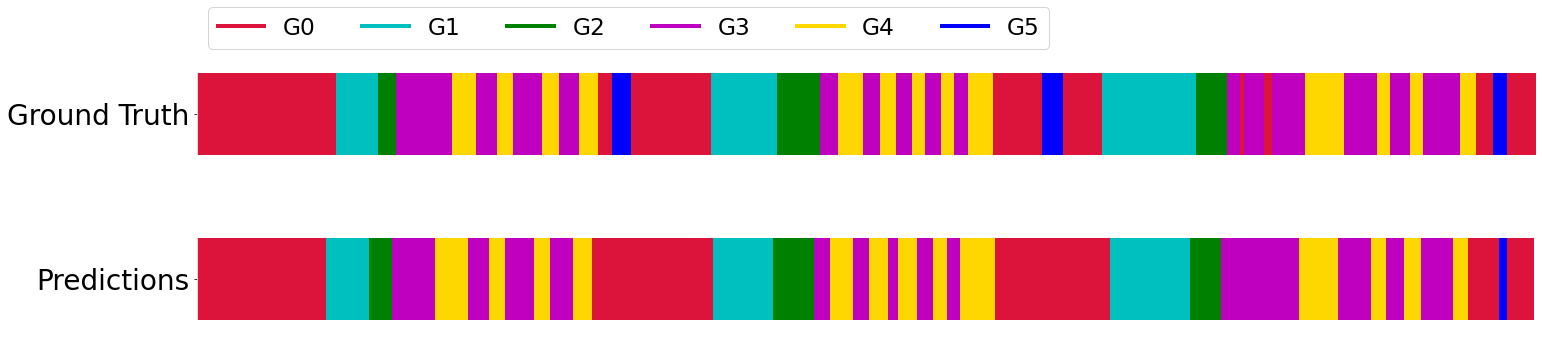

In [85]:
survey(results, category_names)
plt.show()
